In [2]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, SimpleRNN
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
torch.set_printoptions(edgeitems=2, linewidth=75)

ImportError: cannot import name 'SGD' from 'keras.optimizers' (C:\Users\ssx8221\Anaconda3\lib\site-packages\keras\optimizers.py)

In [3]:
t=np.linspace(0,30,1501)
z = 10*np.sin(2*3.14/5*t)*np.exp(-5e-2*t)
z = torch.FloatTensor(z).unsqueeze(1)
t = torch.FloatTensor(t).unsqueeze(1)

z_train = z[0:1001] #training data import
t_train = t[0:1001]
z_test = z[1001:1501] #testing data import
t_test = t[1001:1501]

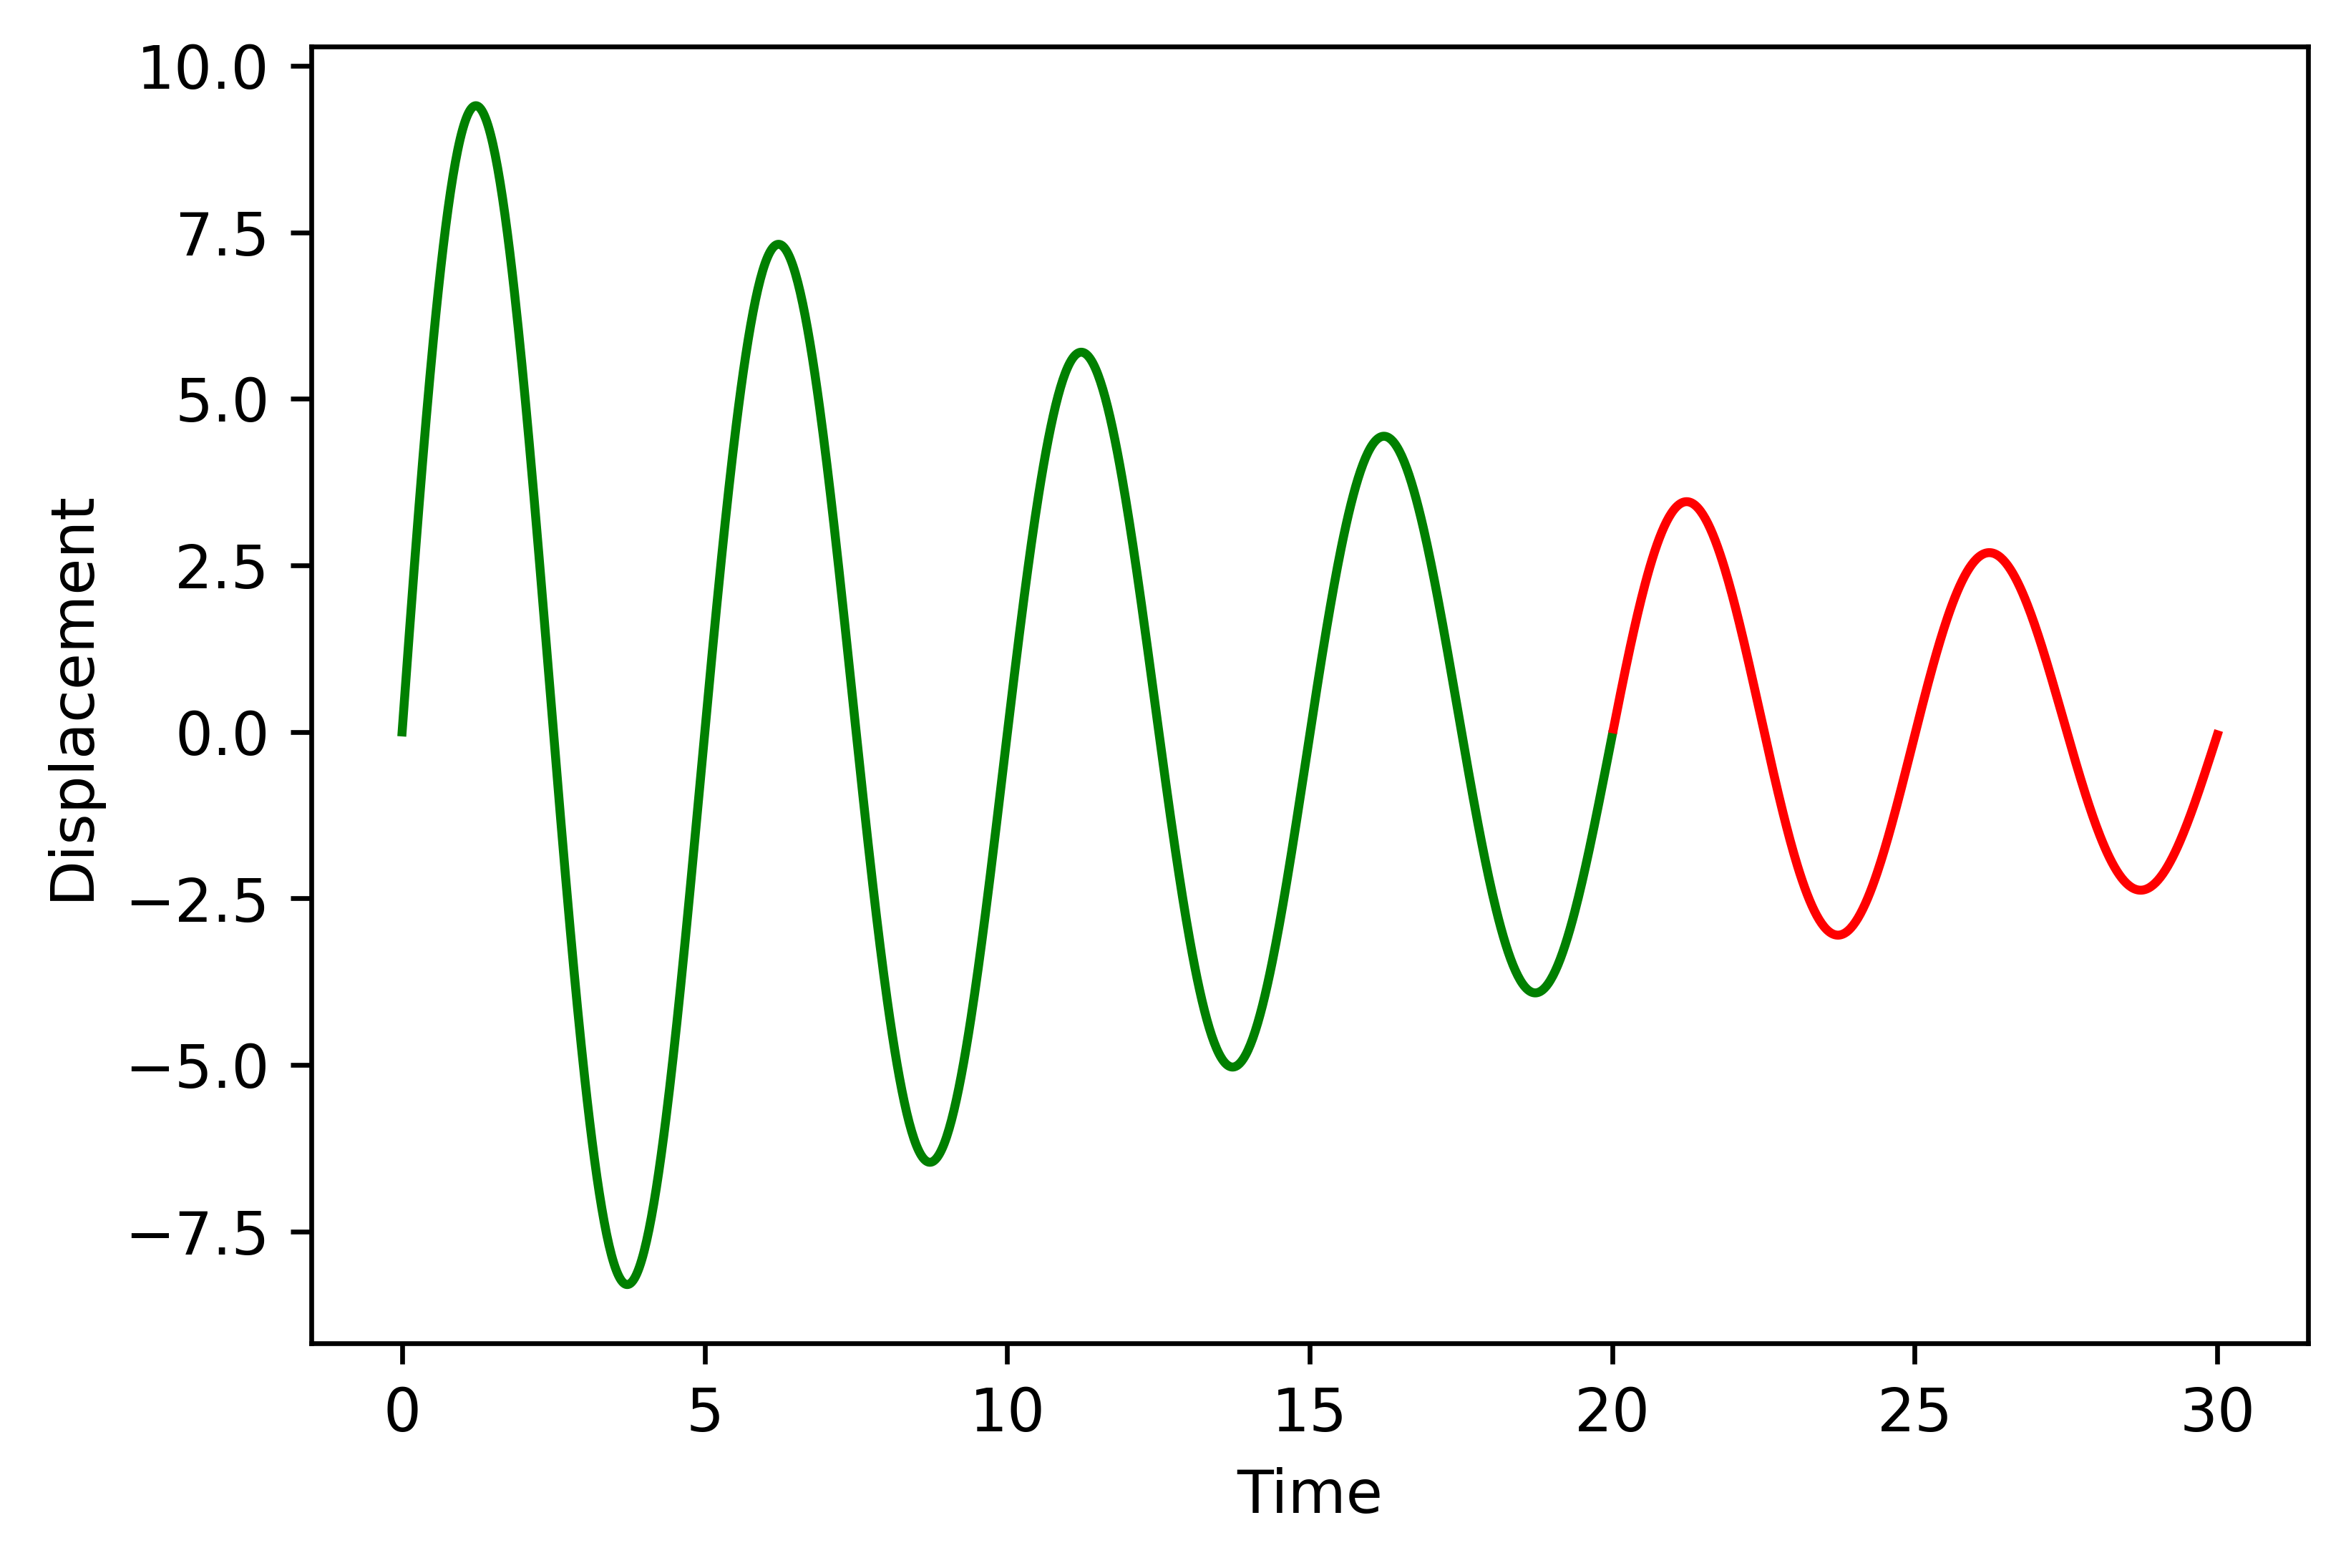

In [4]:
from matplotlib import pyplot as plt

t_range = torch.arange(0.,21).unsqueeze(1)
fig = plt.figure(dpi=600)
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.plot(t_train,z_train,'green',t_test,z_test,'red')

In [5]:
Z_train = z_train.detach().numpy()
T = t.detach().numpy()
Z_test = z_test.detach().numpy()
T_test = t_test.detach().numpy()

In [6]:
X = []
Y = []

seq_len = 2
num_records = len(Z_train) - seq_len

for i in range(num_records - 2 ):
    X.append(Z_train[i:i+seq_len])
    Y.append(Z_train[i+seq_len])
    
X = np.array(X)
Y = np.array(Y)

In [7]:
num_records2 = len(Z_test) - seq_len

X_test = []
Y_test = []
t_test = []
for i in range(num_records2 - 2):
    X_test.append(Z_test[i:i+seq_len])
    Y_test.append(Z_test[i+seq_len])
    t_test.append(T_test[i+seq_len])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [8]:
#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X.shape[1],1)))
#regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
#regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
#regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
#regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X, Y, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 3.1026
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4269
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1128
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0428
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0262
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 13/100
32/32 [=================

In [9]:
# Some functions to help out with
def plot_predictions(test,predicted):
    fig = plt.figure(dpi=600)
    plt.plot(t_test, test, 'r:', label='Real displacement')
    plt.plot(t_test, predicted, 'b--',label='Predicted displacement')
    plt.title('Spring Mass displacement Prediction')
    plt.xlabel('Time')
    plt.ylabel('Displacement')
    plt.legend(loc='upper right')
    plt.show()

In [10]:
predicted_displacement = regressor.predict(X_test)

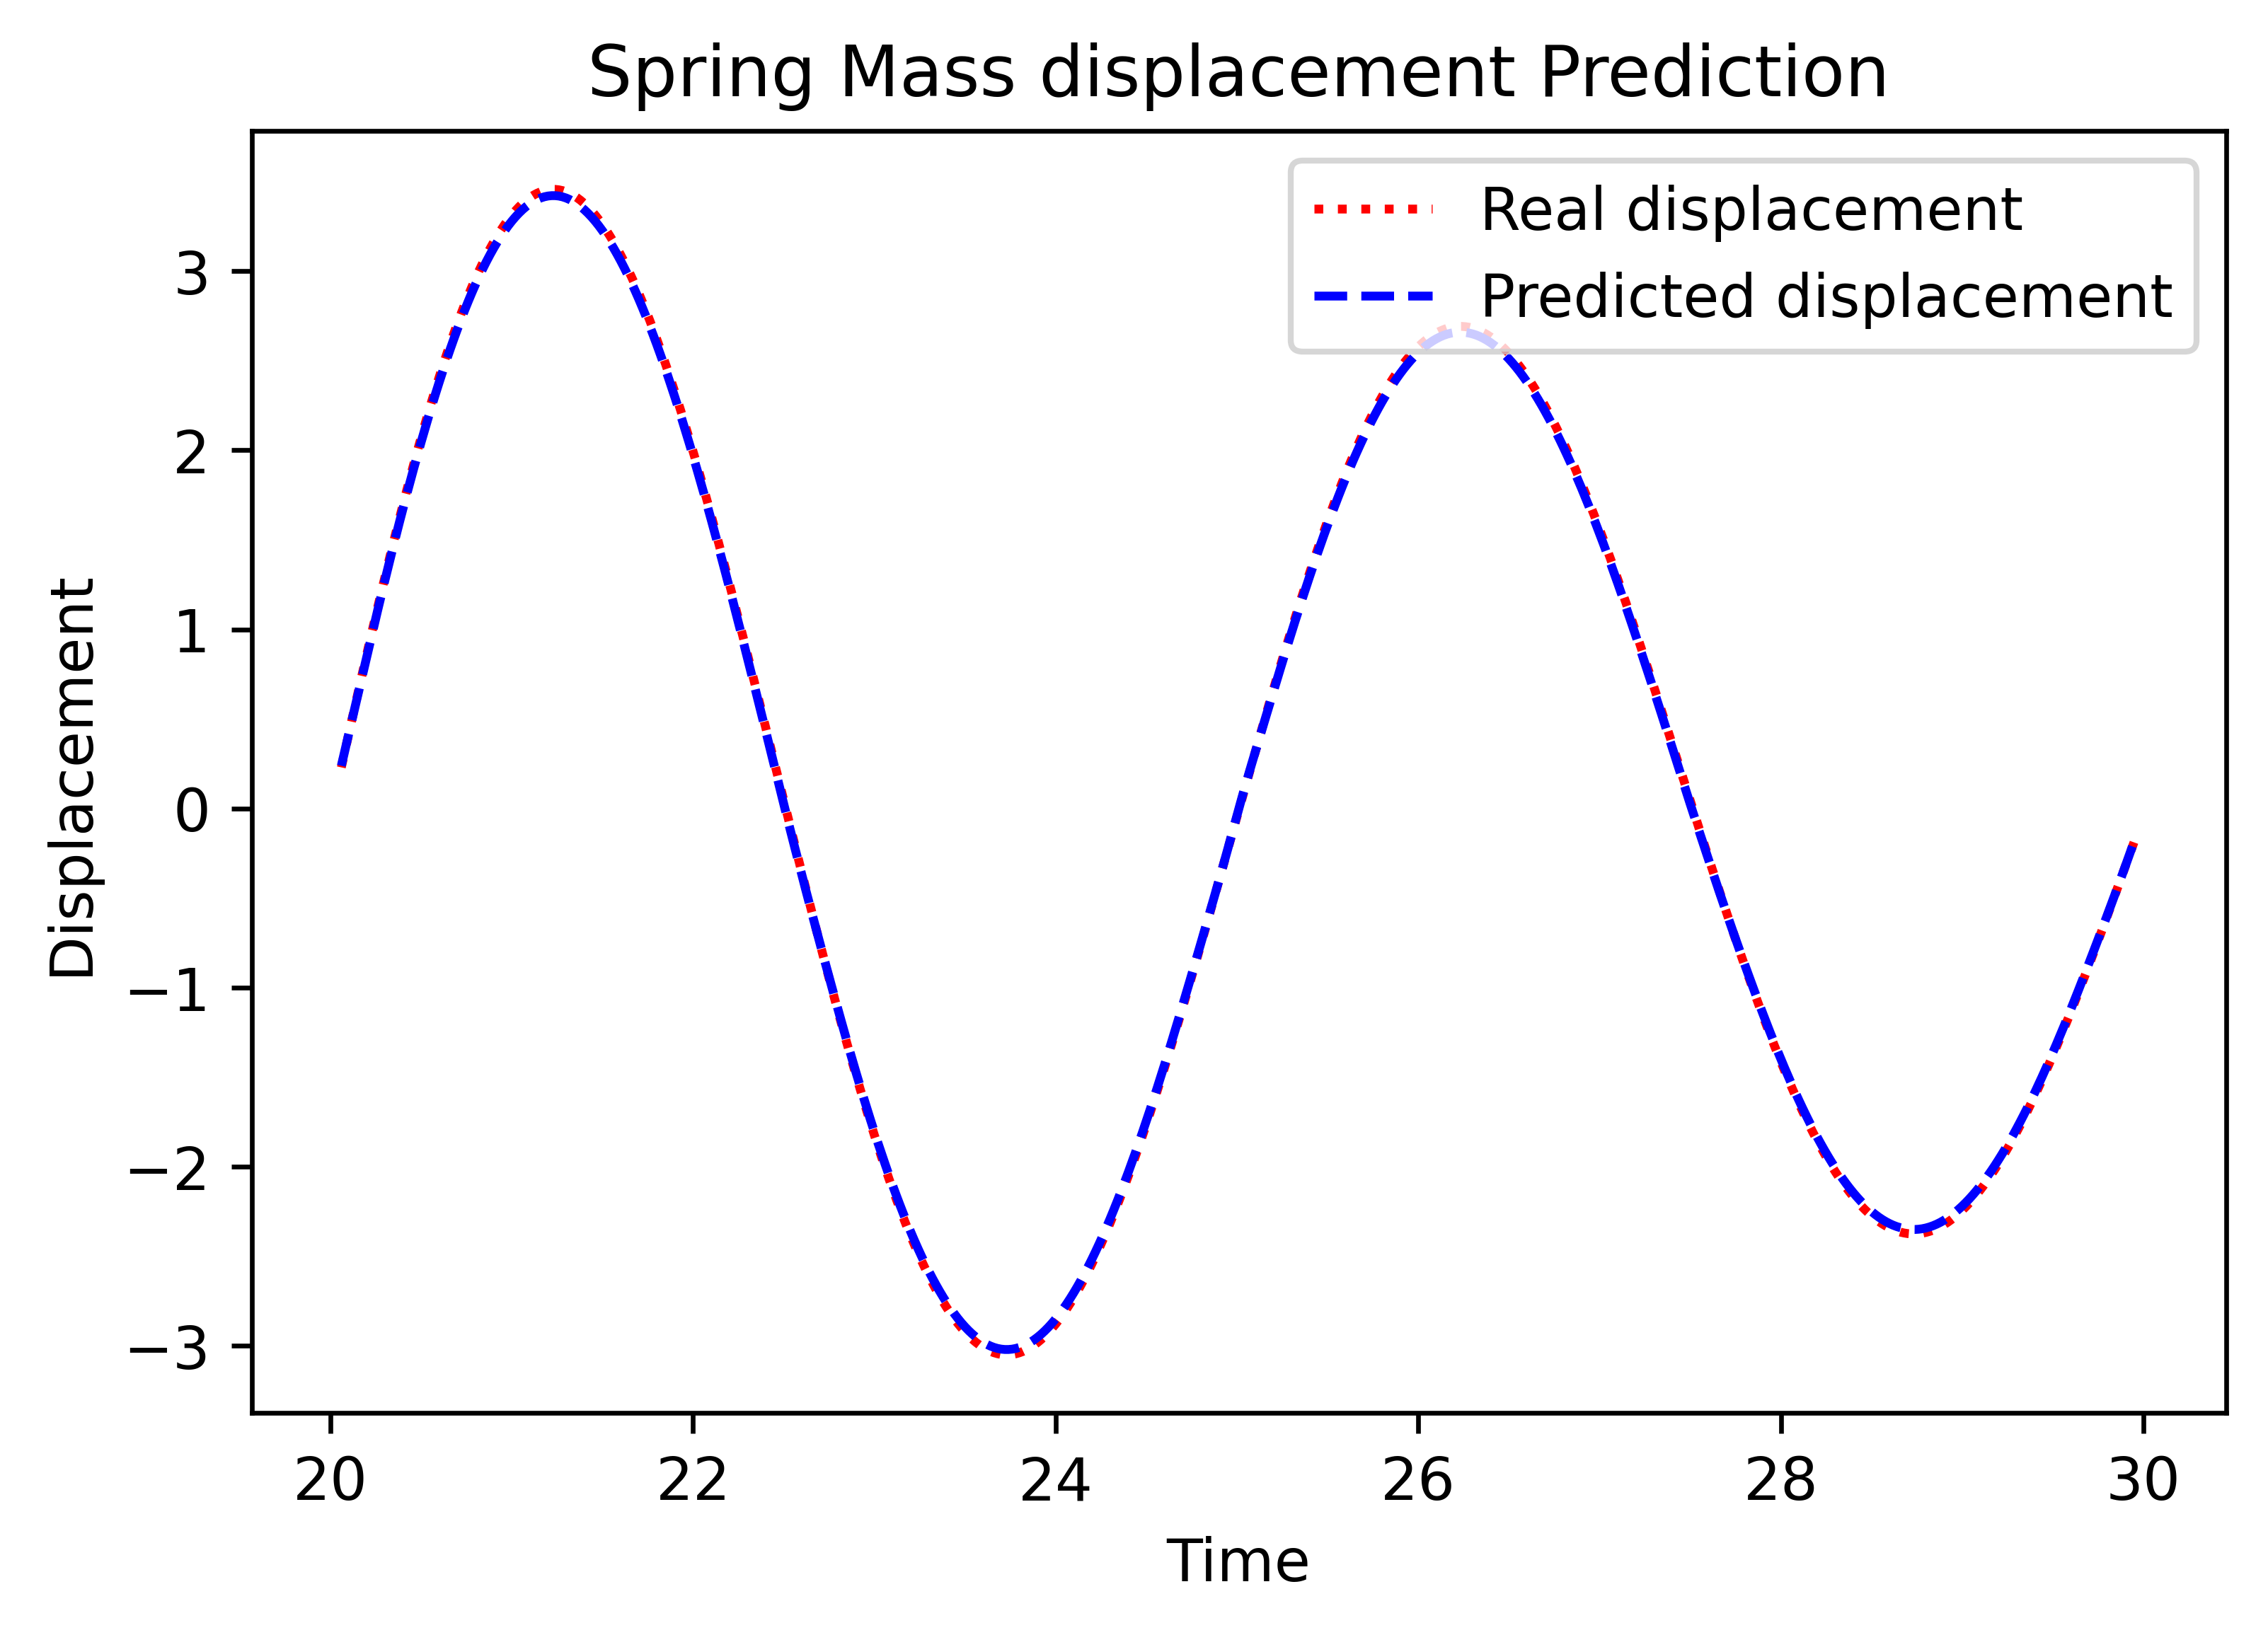

In [11]:
plot_predictions(Y_test,predicted_displacement)

In [12]:
# Evaluating our model
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

return_rmse(Y_test,predicted_displacement)

NameError: name 'math' is not defined

In [ ]:
predicted_displacement.shape

In [ ]:
total = np.append(Z_train, predicted_displacement)

In [ ]:
time = np.linspace(0,30,1497)

In [ ]:
fig = plt.figure(dpi=600)
plt.plot(Z_train,'^',total,'green')
plt.ylabel('Displacement')
plt.xlabel('Time')